# Linear Regression with scikit-learn

This chapter teaches linear regression using `scikit-learn` with a dataset from 
[Deep Learning from HEP](https://hsf-training.github.io/deep-learning-intro-for-hep/).

Download the dataset from [here](https://github.com/hsf-training/deep-learning-intro-for-hep/blob/main/deep-learning-intro-for-hep/data/penguins.csv) 
and place it in a `data/` folder.

The dataset contains the basic measurements on 3 species of penguins!   

![A penguin](https://hsf-training.github.io/deep-learning-intro-for-hep/_images/culmen_depth.png)
￼

```{admonition} Objectives
- Have fun with penguins!
```

```{warning}
Penguins can be very cute.
```

In [1]:
print(2 + 2)

4


In [2]:
import pandas as pd
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


For our regression problem, let's ask, "Given a flipper length (mm), what is the penguin's most likely body mass (g)?"

In [3]:
regression_features, regression_targets = penguins_df.dropna()[["flipper_length_mm", "body_mass_g"]].values.T

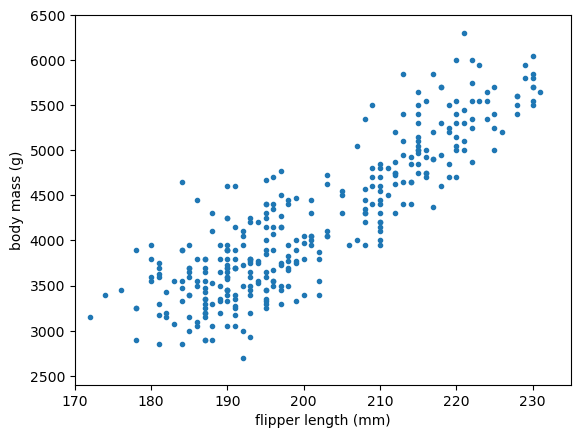

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

def plot_regression_problem(ax, xlow=170, xhigh=235, ylow=2400, yhigh=6500):
    ax.scatter(regression_features, regression_targets, marker=".")
    ax.set_xlim(xlow, xhigh)
    ax.set_ylim(ylow, yhigh)
    ax.set_xlabel("flipper length (mm)")
    ax.set_ylabel("body mass (g)")

plot_regression_problem(ax)

plt.show()

Let's use Scikit-Learn's `LinearRegression`

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [6]:
best_fit = LinearRegression().fit(regression_features[:, np.newaxis], regression_targets)

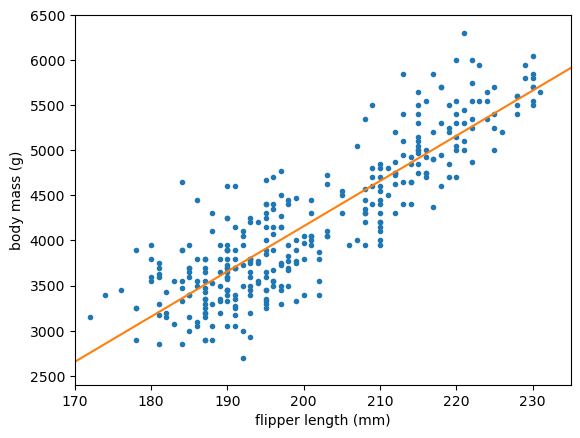

In [7]:
fig, ax = plt.subplots()

def plot_regression_solution(ax, model, xlow=170, xhigh=235):
    model_x = np.linspace(xlow, xhigh, 1000)
    model_y = model(model_x)
    ax.plot(model_x, model_y, color="tab:orange")

plot_regression_solution(ax, lambda x: best_fit.predict(x[:, np.newaxis]))
plot_regression_problem(ax)

plt.show()

In [8]:
print("slope:", best_fit.coef_[0])
print("intercept:", best_fit.intercept_)

slope: 50.15326594224113
intercept: -5872.092682842825
